# European Call Option Pricing

## Import Libraries

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Black-Scholes-Merton (BSM) Model

The Black-Scholes-Merton model is a model of price variation over time of financial instruments and often be used to determine the price of a European call option.

In [2]:
def bsprice(rf, sigma, K, S0, T):
    disc = np.exp(-rf*T)  #discounting
    vol = sigma*np.sqrt(T) #time-scaled volatility

    # calculate price analytically using Black-Scholes
    d1 = ((np.log(S0/K)+(rf+0.5*sigma*sigma)*T))/vol
    d2 = d1-vol
    BSprice = S0*norm.cdf(d1)-disc*K*norm.cdf(d2)
    print "Option price with BS is:", BSprice

In [8]:
# input call option parameters:
rf = (input("risk-free rate: "))              # risk-free rate
sigma = (input("Sigma: "))                    # constant volatility
K = (input("Strike price: "))                 # strike
S0 = (input("Spot price: "))                  # spot at time 0
T= (input("Maturity: "))                      # number of descrete time steps till maturity


bsprice(rf, sigma, K, S0, T)

risk-free rate: 0.01
Sigma: 0.05
Strike price: 15
Spot price: 18
Maturity: 10
Option price with BS is: 4.072516538424944


## Monte Carlo Simulation

The Monte Carlo Simulation is a probability distribution technique used to understand the impact of risk and uncertainty in financial, project management, cost, and other forecasting models. It calculates results over and over, each time using a different set of random values from the probability functions. Pricing the financial dervative such as European Call Option can be broadly split into finding expectations analytically or via a simulation.

In [4]:
def mcprice(n, rf, sigma, K, S0, T):

    disc = np.exp(-rf*T)  
    vol = sigma*np.sqrt(T)
    
    # simulate N terminal prices by using normal distribution
    rands=np.random.normal(size=n)
    
    # calculate price analytically using Monte Carlo Simulation
    ST=S0*np.exp((rf-0.5*sigma*sigma)*T + vol*rands)
    payoff = np.multiply([p if p > 0 else 0 for p in ST-K], disc)
    MCprice = np.mean(payoff,axis=0)
    print "Option price with MC is:", MCprice
    
    #Plot the Histogram of terminate price using Monte Carlo Probabilistic Simulation
    fig, axes = plt.subplots(1, 1, figsize=(6, 5))
    ax = plt.hist(payoff, bins=100, color='red', alpha=0.7)
    ax = fig.gca()
    ax.set_title("Histogram of terminate price using Monte Carlo Probabilistic Simulation")
    return ax

Number of seed: 100000
Risk-free rate: 0.01
Sigma: 0.05
Strike price: 15
Spot price: 18
Maturity: 10
Option price with MC is: 4.458099176055742


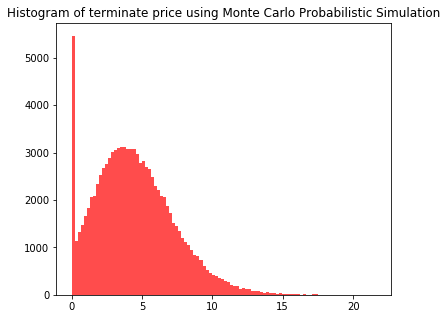

In [5]:
# input call option parameters:
n = (input("Number of seed: "))               # number of seed
rf = (input("Risk-free rate: "))              # risk-free rate
sigma = (input("Sigma: "))                    # constant volatility
K = (input("Strike price: "))                 # strike
S0 = (input("Spot price: "))                  # spot at time 0
T= (input("Maturity: "))                      # number of descrete time steps till maturity


mcprice(n, rf, sigma, K, S0, T)